Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



In [1]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=383d6674014451c472609415f11596eb1142a3ae3c7048fcc84cd160398d61cc
  Stored in directory: C:\Users\rashm\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
fraud= pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"income",
                      "City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
fraud.head()

,undergrad,marital,income,population,experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variables
df=pd.get_dummies(fraud,columns=['undergrad','marital','urban'], drop_first=True)

In [6]:
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


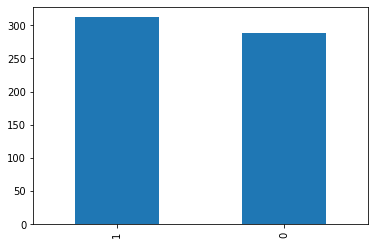

In [7]:
ax = df.undergrad_YES.value_counts().plot(kind='bar')

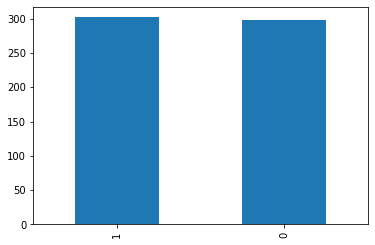

In [8]:
#gender
ax = df.urban_YES.value_counts().plot(kind='bar')

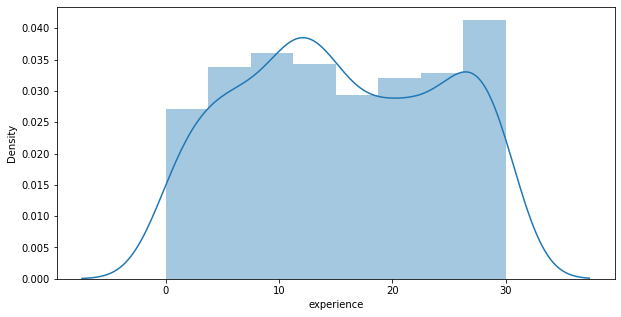

In [9]:
import seaborn as sns
df['experience'] = df['experience'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['experience'])
plt.show()

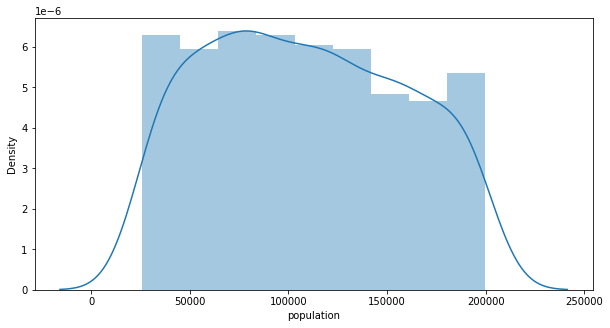

In [10]:
import seaborn as sns
df['population'] = df['population'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['population'])
plt.show()

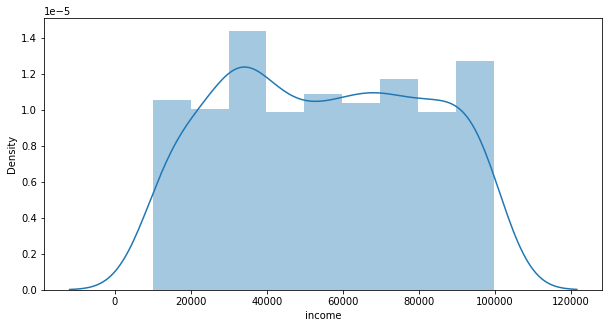

In [11]:
import seaborn as sns
df['income'] = df['income'].astype(float)
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['income'])
plt.show()

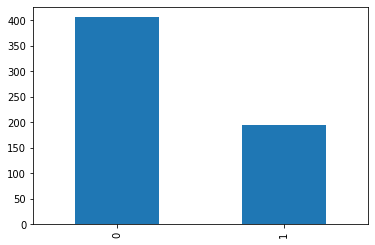

In [12]:
ax = df.marital_Married.value_counts().plot(kind='bar')

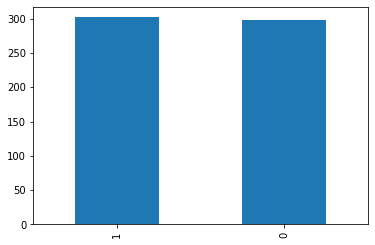

In [13]:
ax = df.urban_YES.value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

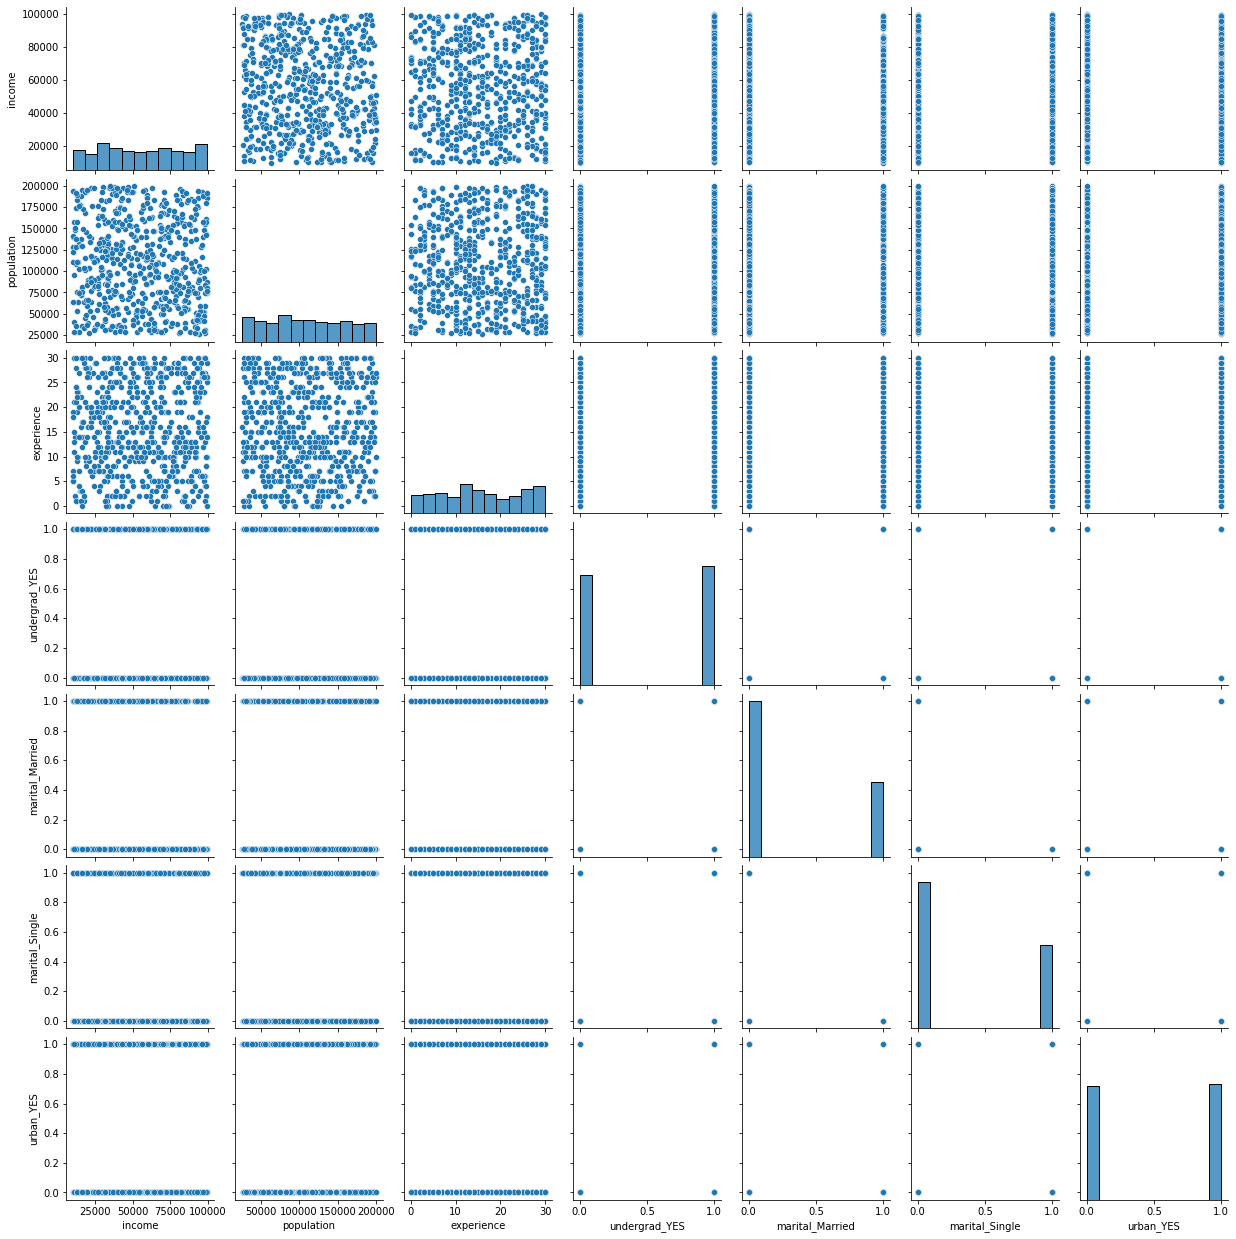

In [14]:
plt.figure(figsize=(12,8))
sns.pairplot(df)
plt.show

<AxesSubplot:>

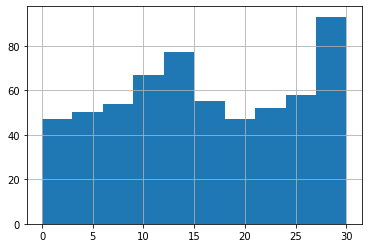

In [15]:
df.experience.hist()

<AxesSubplot:>

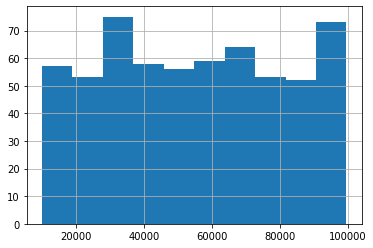

In [16]:
df.income.hist()

<AxesSubplot:xlabel='urban_YES', ylabel='count'>

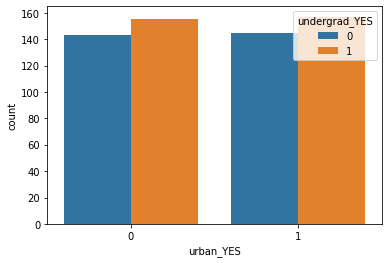

In [17]:
sns.countplot(df['urban_YES'],hue=df['undergrad_YES'])

<AxesSubplot:>

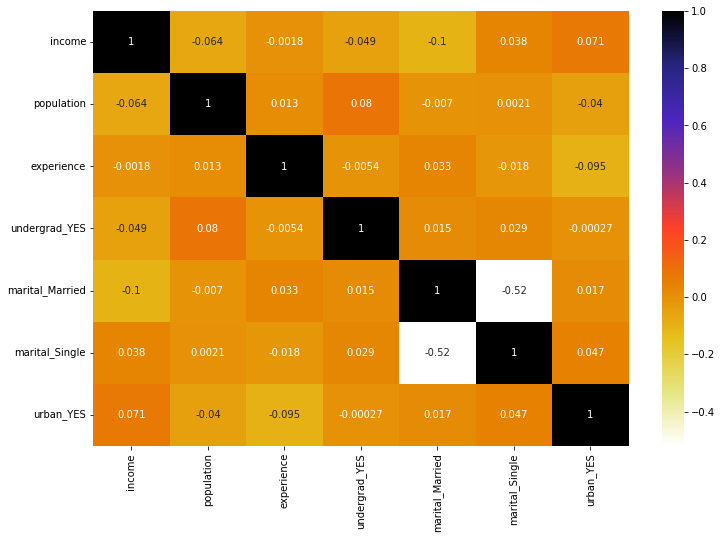

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.CMRmap_r)

In [19]:
# Converting the Sales column into categorical value using mean of the column 7.49
taxable_val = []
for value in df["income"]:
    if value<=30000:
        taxable_val.append("risky")
    else:
        taxable_val.append("good")
df["taxable_val"]= taxable_val

In [20]:
df.head()

,income,population,experience,undergrad_YES,marital_Married,marital_Single,urban_YES,taxable_val
0,68833.0,50047.0,10.0,0,0,1,1,good
1,33700.0,134075.0,18.0,1,0,0,1,good
2,36925.0,160205.0,30.0,0,1,0,1,good
3,50190.0,193264.0,15.0,1,0,1,1,good
4,81002.0,27533.0,28.0,0,1,0,0,good


In [21]:
X = df.drop(['income','taxable_val'], axis =1)
Y = df['taxable_val'] #Y is our target variable

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y)

Random forest

In [26]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 4

In [30]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7433333333333334


Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7

cart = DecisionTreeClassifier()
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
(results1.mean())

0.7466666666666667

Boosting

In [32]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
(results2.mean())

0.775

Stacking

In [33]:
from sklearn.linear_model import LogisticRegression #this are the 3 models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier #stores all 3 models

# create the sub models
estimators = [] #list comprises of all the 3 models
model4 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))
model6 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
(results.mean())

0.7833333333333333